## Environment Setting

In [ ]:
# """
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install dominate==2.4.0
!pip install detectron2==0.1.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/index.html
# !pip install visdom==0.1.8.9
# """

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8 MB 21 kB/s 
     |████████████████████████████████| 6.6 MB 64.0 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.5.0+cu101

## Clone the file from Gihub

## Start Colorization

## Download the Model

In [ ]:
# !sh scripts/download_model.sh
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rsync -a -v --exclude={"/content/drive/MyDrive/equipe projeto 1/instanceImage/checkpoints"} "/content/drive/MyDrive/equipe projeto 1/instanceImage/" /content/

sending incremental file list
rsync: link_stat "/content/projeto" failed: No such file or directory (2)
rsync: change_dir "/content//1/instanceImage" failed: No such file or directory (2)
./
Metricas.ipynb
checkpoints/coco_full/0_net_G.pth
checkpoints/coco_full/100_net_G.pth
checkpoints/coco_full/101_net_G.pth
checkpoints/coco_full/102_net_G.pth
checkpoints/coco_full/103_net_G.pth
checkpoints/coco_full/104_net_G.pth
checkpoints/coco_full/105_net_G.pth
checkpoints/coco_full/106_net_G.pth
checkpoints/coco_full/107_net_G.pth
checkpoints/coco_full/108_net_G.pth
checkpoints/coco_full/109_net_G.pth
checkpoints/coco_full/10_net_G.pth
checkpoints/coco_full/110_net_G.pth
checkpoints/coco_full/111_net_G.pth
checkpoints/coco_full/112_net_G.pth
checkpoints/coco_full/113_net_G.pth
checkpoints/coco_full/114_net_G.pth
checkpoints/coco_full/115_net_G.pth
checkpoints/coco_full/116_net_G.pth
checkpoints/coco_full/117_net_G.pth
checkpoints/coco_full/118_net_G.pth
checkpoints/coco_full/119_net_G.pth
check

In [ ]:
!rsync -a -v "/content/drive/MyDrive/equipe projeto 1/instanceImage/checkpoints" /content/

sending incremental file list

sent 7,895 bytes  received 23 bytes  5,278.67 bytes/sec
total size is 46,952,965,578  speedup is 5,929,902.19


In [ ]:
!cd /content/train_data &&\
  unzip -o painting.zip -d painting/

Archive:  painting.zip
  inflating: painting/0001.jpg       
  inflating: painting/0002.jpg       
  inflating: painting/0003.jpg       
  inflating: painting/0004.jpg       
  inflating: painting/0005.jpg       
  inflating: painting/0007.jpg       
  inflating: painting/0008.jpg       
  inflating: painting/0010.jpg       
  inflating: painting/0011.jpg       
  inflating: painting/0013.jpg       
  inflating: painting/0014.jpg       
  inflating: painting/0015.jpg       
  inflating: painting/0016.jpg       
  inflating: painting/0018.jpg       
  inflating: painting/0019.jpg       
  inflating: painting/0020.jpg       
  inflating: painting/0021.jpg       
  inflating: painting/0022.jpg       
  inflating: painting/0023.jpg       
  inflating: painting/0024.jpg       
  inflating: painting/0026.jpg       
  inflating: painting/0027.jpg       
  inflating: painting/0028.jpg       
  inflating: painting/0029.jpg       
  inflating: painting/0030.jpg       
  inflating: painting/0031.

In [ ]:
!cd /content/test_data &&\
  unzip -o painting.zip -d .

Archive:  painting.zip
  inflating: ./painting/0006.jpg     
  inflating: ./painting/0009.jpg     
  inflating: ./painting/0012.jpg     
  inflating: ./painting/0017.jpg     
  inflating: ./painting/0039.jpg     
  inflating: ./painting/0041.jpg     
  inflating: ./painting/0080.jpg     
  inflating: ./painting/0088.jpg     
  inflating: ./painting/0098.jpg     
  inflating: ./painting/0113.jpg     
  inflating: ./painting/0123.jpg     
  inflating: ./painting/0124.jpg     
  inflating: ./painting/0136.jpg     
  inflating: ./painting/0137.jpg     
  inflating: ./painting/0145.jpg     
  inflating: ./painting/0177.jpg     
  inflating: ./painting/0201.jpg     
  inflating: ./painting/0208.jpg     
  inflating: ./painting/0221.jpg     
  inflating: ./painting/0240.jpg     
  inflating: ./painting/0245.jpg     
  inflating: ./painting/0279.jpg     
  inflating: ./painting/0280.jpg     
  inflating: ./painting/0283.jpg     
  inflating: ./painting/0284.jpg     
  inflating: ./painting/028

In [ ]:
!cd /content/test_data &&\
  rm -r *.jpg

### Detect Object bounding box


Setting the Detectron2.

In [ ]:
from os.path import join, isfile, isdir
from os import listdir
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from argparse import ArgumentParser

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

import torch

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

Let's create a bounding box folder to save our prediction results.

In [ ]:
import cv2
import subprocess
import sys

from os import *
from os import listdir
from os.path import isfile, join
from options.train_options import TestOptions

input_dir = "/content/test_data/painting"
sys.argv = [sys.argv[0]]
opt = TestOptions().parse()

opt.results_img_dir = input_dir + '_results'
opt.test_img_dir = input_dir
# opt.test_img_dir = "/content/test_data/painting"

IMAGE_ID_LIST = [f for f in listdir(opt.test_img_dir) if isfile(join(opt.test_img_dir, f))]
dataset_size = len(IMAGE_ID_LIST)
print("dataset_size", dataset_size)
quantidade = 0
for epoch, image_id in zip(range(dataset_size), IMAGE_ID_LIST):
    try:
        image = cv2.imread("{}/{}".format(opt.test_img_dir, image_id))
        if image.shape:
            pass
        # print(image.shape, epoch)
        quantidade+=1
    except:
        subprocess.run(["rm", "{}/{}".format(opt.test_img_dir, image_id)], capture_output=True)
        
print("quantidade", quantidade)

dataset_size 236
quantidade 228


In [ ]:
input_dir = "/content/test_data/painting"
image_list = [f for f in listdir(input_dir) if isfile(join(input_dir, f))]
output_npz_dir = "{0}_bbox".format(input_dir)
if os.path.isdir(output_npz_dir) is False:
    print('Create path: {0}'.format(output_npz_dir))
    os.makedirs(output_npz_dir)

Create path: /content/test_data/painting_bbox


Here we simply take L channel as our input and make sure that we can get consistent box prediction results even though the original image is color images.

In [ ]:
for image_path in image_list:
    img = cv2.imread(join(input_dir, image_path))
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    l_stack = np.stack([l_channel, l_channel, l_channel], axis=2)
    outputs = predictor(l_stack)
    save_path = join(output_npz_dir, image_path.split('.')[0])
    pred_bbox = outputs["instances"].pred_boxes.to(torch.device('cpu')).tensor.numpy()
    pred_scores = outputs["instances"].scores.cpu().data.numpy()
    np.savez(save_path, bbox = pred_bbox, scores = pred_scores)

Now we have all the images' prediction results.

In [ ]:
# !ls example_bbox

### Colorize Images

We first set up some libraries and options

In [ ]:
import sys
import time
from options.train_options import TestOptions
from models import create_model

import torch
from tqdm import tqdm_notebook

from fusion_dataset import Fusion_Testing_Dataset
from util import util
import multiprocessing
multiprocessing.set_start_method('spawn', True)

torch.backends.cudnn.benchmark = True

sys.argv = [sys.argv[0]]
opt = TestOptions().parse()

Then we need to create a results folder to save our predicted color images and read the dataset loader.

In [ ]:
opt

Namespace(A=23.0, B=23.0, ab_max=110.0, ab_norm=110.0, ab_quant=10.0, aspect_ratio=1.0, avg_loss_alpha=0.986, batch_size=25, beta1=0.9, checkpoints_dir='./checkpoints', classification=False, dataset_mode='aligned', display_freq=2000, display_id=1, display_ncols=5, display_port=8097, display_server='http://localhost', display_winsize=256, epoch_count=0, fineSize=256, gpu_ids=[0], half=False, how_many=200, init_type='normal', input_nc=1, isTrain=False, l_cent=50.0, l_norm=100.0, lambda_A=1.0, lambda_B=1.0, lambda_GAN=0.0, lambda_identity=0.5, loadSize=256, load_model=False, lr=0.0001, lr_decay_iters=50, lr_policy='lambda', mask_cent=0.5, max_dataset_size=inf, model='fusion', nThreads=4, n_layers_D=3, name='test_fusion', ndf=64, ngf=64, niter=100, niter_decay=100, no_dropout=False, no_flip=False, no_html=False, no_lsgan=False, norm='batch', output_nc=2, phase='val', pool_size=50, print_freq=2000, resize_or_crop='resize_and_crop', results_dir='./results/', results_img_dir='results', sample

In [ ]:
opt.results_img_dir = input_dir + '_results'
opt.test_img_dir = input_dir

save_img_path = opt.results_img_dir

if os.path.isdir(save_img_path) is False:
    print('Create path: {0}'.format(save_img_path))
    os.makedirs(save_img_path)
opt.batch_size = 1
dataset = Fusion_Testing_Dataset(opt, -1)
dataset_loader = torch.utils.data.DataLoader(dataset, batch_size=opt.batch_size)

dataset_size = len(dataset)
print('#Testing images = %d' % dataset_size)

Create path: /content/test_data/painting_results
#Testing images = 228


Load the pre-trained model.

In [ ]:
model = create_model(opt)
model.setup_to_test('coco_finetuned_mask_256_ffs')

initialize network with normal
initialize network with normal
initialize network with normal
model [FusionModel] was created
load Fusion model from checkpoints/coco_finetuned_mask_256_ffs/latest_net_GF.pth


Start to colorize every images in `dataset_loader`.

In [ ]:
count_empty = 0
for data_raw in tqdm_notebook(dataset_loader):
    data_raw['full_img'][0] = data_raw['full_img'][0].cuda()
    if data_raw['empty_box'][0] == 0:
        data_raw['cropped_img'][0] = data_raw['cropped_img'][0].cuda()
        box_info = data_raw['box_info'][0]
        box_info_2x = data_raw['box_info_2x'][0]
        box_info_4x = data_raw['box_info_4x'][0]
        box_info_8x = data_raw['box_info_8x'][0]
        cropped_data = util.get_colorization_data(data_raw['cropped_img'], opt, ab_thresh=0, p=opt.sample_p)
        full_img_data = util.get_colorization_data(data_raw['full_img'], opt, ab_thresh=0, p=opt.sample_p)
        model.set_input(cropped_data)
        model.set_fusion_input(full_img_data, [box_info, box_info_2x, box_info_4x, box_info_8x])
        model.forward()
    else:
        count_empty += 1
        full_img_data = util.get_colorization_data(data_raw['full_img'], opt, ab_thresh=0, p=opt.sample_p)
        model.set_forward_without_box(full_img_data)
    model.save_current_imgs(join(save_img_path, data_raw['file_id'][0] + '.png'))
print('{0} images without bounding boxes'.format(count_empty))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/228 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


18 images without bounding boxes


In [ ]:
import matplotlib.pyplot as plt

def display_progress(cond, fake, real, figsize=(10,5)):
    # cond = cond.detach().cpu().permute(1, 2, 0)
    # fake = fake.detach().cpu().permute(1, 2, 0)
    # real = real.detach().cpu().permute(1, 2, 0)


    fig, ax = plt.subplots(1, 3, figsize=figsize)
    ax[0].imshow(cond)
    ax[0].title.set_text('Input Image')
    ax[0].axis('off')
    ax[2].imshow(fake)
    ax[2].title.set_text('Predicted Image')
    ax[2].axis('off')
    ax[1].imshow(real)
    ax[1].title.set_text('Ground Truth')
    ax[1].axis('off')
    plt.show()

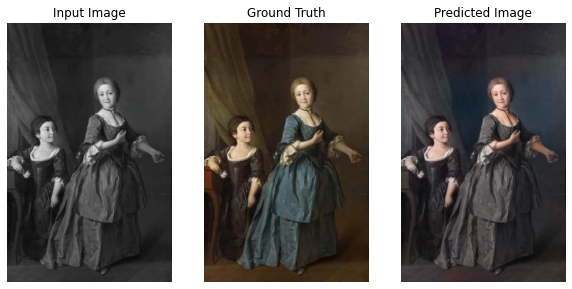

In [ ]:
from google.colab.patches import cv2_imshow
img_name_list = list(map(lambda x: x[:-4], image_list))
show_index = 3
entrada = opt.test_img_dir + "/"
saida = opt.results_img_dir + "/"

img = cv2.imread(entrada + img_name_list[show_index] + '.jpg')
image_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, _, _ = cv2.split(lab_image)

img = cv2.imread(saida + img_name_list[show_index] + '.png')
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
_, a_pred, b_pred = cv2.split(lab_image)
a_pred = cv2.resize(a_pred, (l_channel.shape[1], l_channel.shape[0]))
b_pred = cv2.resize(b_pred, (l_channel.shape[1], l_channel.shape[0]))
gray_color = np.ones_like(a_pred) * 128

gray_image = cv2.cvtColor(np.stack([l_channel, gray_color, gray_color], 2), cv2.COLOR_LAB2RGB)
color_image = cv2.cvtColor(np.stack([l_channel, a_pred, b_pred], 2), cv2.COLOR_LAB2RGB)
# print(color_image.shape, lab_image.shape)
# save_img_path = 'results_origin/'
# if os.path.isdir(save_img_path) is False:
#     print('Create path: {0}'.format(save_img_path))
#     os.makedirs(save_img_path)

# cv2.imwrite('results_origin/'+img_name_list[show_index]+'.png', color_image)

# cv2_imshow(np.concatenate([gray_image, color_image], 1))
display_progress(gray_image, color_image, image_original)

In [ ]:
from os import  listdir
print("tamanho do dataset de treino:", len(listdir("/content/train_data/painting")))
print("tamanho do dataset de teste:", len(listdir("/content/test_data/painting")))

tamanho do dataset de treino: 2042
tamanho do dataset de teste: 228


In [ ]:
from skimage.metrics import structural_similarity as compare_ssim

elementos = []
psnr = 0
ssim = 0
opt.results_img_dir = input_dir + '_results'
opt.test_img_dir = input_dir

for image_id in listdir(opt.results_img_dir):
  if isfile(join(opt.results_img_dir, image_id)):
    elemento = {
        "arquivo": image_id,
        "real": cv2.resize(
              cv2.imread("{}/{}.jpg".format(opt.test_img_dir, image_id[:-4])),
                           (256,256), interpolation = cv2.INTER_AREA),        
        "fake": cv2.imread("{}/{}".format(opt.results_img_dir, image_id)),
    }
    elemento["psnr"] = cv2.PSNR(elemento["real"], elemento["fake"])
    elemento["ssim"] = compare_ssim(elemento["real"], elemento["fake"], multichannel=True, win_size=3)
    psnr += elemento["psnr"]
    ssim += elemento["ssim"]
    elementos.append(elemento)

qtd = len(elementos)
psnr = psnr/qtd
ssim = ssim/qtd
print(f"Quantidade de imagens para teste: {qtd}")
print("PNSR: %.4f" % psnr)
print("SSIM: %.4f" % ssim)


Quantidade de imagens para teste: 228
PNSR: 24.9803
SSIM: 0.9282


In [ ]:
elementos[0]["fake"].shape # 256, 256, 3

(256, 256, 3)

In [ ]:
elementos[0]["real"].shape # 256, 256, 3


(256, 256, 3)